# Below is the implementation of GMM using python sklearn library

#Importing libraries

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

#loading data and printing first five rows

In [4]:
data=pd.read_csv('crimedata.csv', encoding= "ISO-8859-1")
data = data.replace('?', '0')
#data = data.replace('?', np.NaN)
#data.dropna(inplace=True)
print("Input Data and Shape")
print(data.shape)
data.head()

Input Data and Shape
(2215, 147)


,Êcommunityname,state,countyCode,communityCode,fold,population,householdsize,racepctblack,racePctWhite,racePctAsian,...,burglaries,burglPerPop,larcenies,larcPerPop,autoTheft,autoTheftPerPop,arsons,arsonsPerPop,ViolentCrimesPerPop,nonViolPerPop
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,0,0,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,0,0,306.64,0
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,0,9988.79


In [0]:
#converting huge ranges of data to average values
def extractSubstring(myStr):
    if "-" in myStr :
        lowVal,hiVal = myStr.split("-")  
    
        lowVal = re.sub(r'[^\w]', '', lowVal)
        hiVal = re.sub(r'[^\w]', '', hiVal)
    
        lowVal = atof(lowVal)
        hiVal = atof(hiVal)
        lowV = float(lowVal)
        hiV = float(hiVal)
        average = (lowV + hiV)/2
    else:
        lowVal = myStr
        average = convert_to_float(lowVal)
        
    return average

def convert_to_float(input_str):
    return float(input_str.replace(",",""))

data['PolicReqPerOffic'] = data['PolicReqPerOffic'].apply(extractSubstring)
data['ViolentCrimesPerPop'] = data['ViolentCrimesPerPop'].apply(extractSubstring)

In [0]:
#apply these functions to the relevant columns

#data['EstSF'] = data['EstSF'].apply(money_to_float)

#select features to start clustering 

In [0]:
Features = ['PolicReqPerOffic','ViolentCrimesPerPop']
X = data[Features].values

#applying GMM to cluster the dataset based on Violent crimes per population and for crimes occuring what number of police are required to control and handle the crime. 

Text(0.5,1,'GMM Clustering')

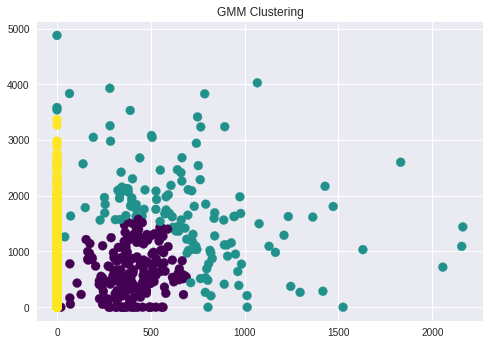

In [8]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=3).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=80, cmap='viridis');
plt.title("GMM Clustering")